# Import Libraries

In [61]:
#Linear Algebra
import numpy as np

#Data Analysis
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB


from sklearn.decomposition import PCA
from sklearn.model_selection import  train_test_split

#Evaluation
from sklearn.metrics import confusion_matrix,classification_report,roc_curve

# Getting Data

In [2]:
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

# EDA

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The training-set has **891** entries with **11** features and **target variable(survived)**.2 features are of type float, 5 are object and 4 normal integer.

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can clearly see from above statistics that survival rate  is about **38%** in training data.we can also notice that age ranges from 0.4 years to 80 years.

In [5]:
train_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


From the above table ,we can note few things like features have widely different ranges so we need to convert them roughly to same scale, some features have missing values that we need to deal with.Also we need to convert  some features to numeric data for machine learning process.

In [6]:
total = train_df.isnull().sum().sort_values(ascending=False)
per = train_df.isnull().sum()/train_df.isnull().count()*100
perc = per.apply(lambda x:round(x,1)).sort_values(ascending=False)
missing_data = pd.concat([total,perc],axis=1,keys=['Total','%'])

In [7]:
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


The Embarked feature has only 2 missing values, which can be easily filled.It will be much more tricky to deal with **Age** feature , as it has 177 missing values.Cabin feature needs more investigation or simply drop it as it has **77%** data missing.

In [8]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

From the above list(features + target) , all feature except **passengerId,Name,Ticket** would contribute to survival rate.

**Lets plot them against target variable**

 **1. Age and Sex**

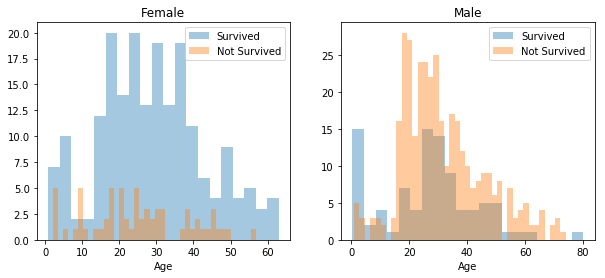

In [9]:
#plt.figure(figsize=(10,4))
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1]['Age'].dropna(),bins=20,kde=False,ax=axes[0],label='Survived')
ax = sns.distplot(women[women['Survived']==0]['Age'].dropna(),bins=40,kde=False,ax=axes[0],label='Not Survived')
ax.set_title('Female')
ax1 = sns.distplot(men[men['Survived']==1]['Age'].dropna(),bins=20,kde=False,ax=axes[1],label='Survived')
ax1 = sns.distplot(men[men['Survived']==0]['Age'].dropna(),bins=40,kde=False,ax=axes[1],label='Not Survived')
ax1.set_title('Male')
ax.legend()
ax1.legend()
plt.show()


As we can see from the above plots that females have high probability of survival when they are between  14 and 40 years.Males have high chances of survival when they are between 18 and 30.Also Infants have high chances of survival.Men have very less chances when they are between 5 and 15.

** Embarked, Pclass and Sex**

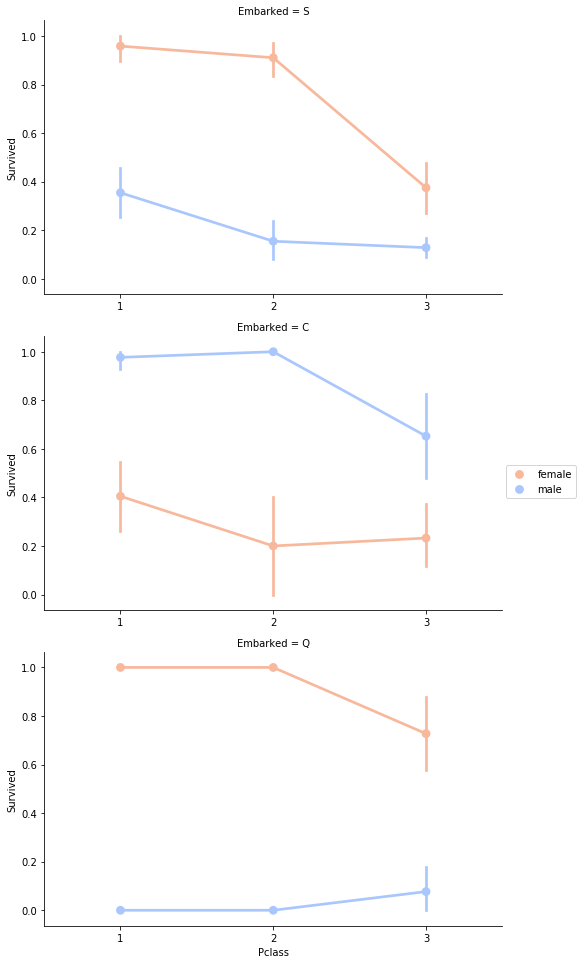

In [10]:
FacetGrid = sns.FacetGrid(train_df,'Embarked',size=4.5,aspect=1.6)
FacetGrid.map(sns.pointplot,'Pclass','Survived','Sex',palette='coolwarm')
FacetGrid.add_legend()

Embarked seems highly correlated with Sex.At S and Q females have high chances of survival and at C males have high chances.
we can see that Pclass is also correlated with Survival.

**PClass**

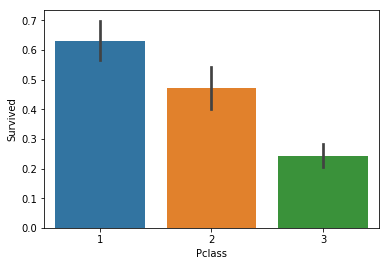

In [11]:
sns.barplot(x='Pclass',y='Survived',data=train_df)

Here we can see that Pclass contributing to person survival chances.With Pclass = 1 ,person has high chances of survival and then Pclass = 2 and so on.

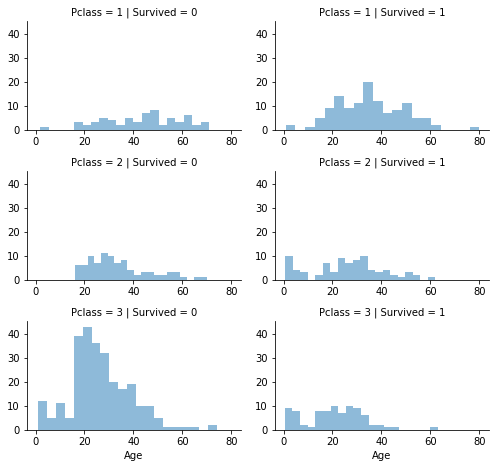

In [12]:
grid =sns.FacetGrid(train_df,row='Pclass',col='Survived',size=2.2,aspect=1.6,palette='coolwarm')
grid.map(plt.hist,'Age',alpha =.5,bins=20)

This graph also shows that Pclass is correlated with Survival.Also in Pclass 3 person has high chances of death.

**SibSp and ParCh**
* Sibling/Spouse and Parent/Children would make more sense as a combined feature,that shows the total number of relatives with him/her.

In [13]:
train_df['Relatives'] = train_df['SibSp']+train_df['Parch'] 
train_df.loc[train_df['Relatives']>0,'Alone']=0
train_df.loc[train_df['Relatives']==0,'Alone']=1
train_df.Alone=train_df.Alone.astype('int') #by default float

In [14]:
train_df.Alone.value_counts()

1    537
0    354
Name: Alone, dtype: int64

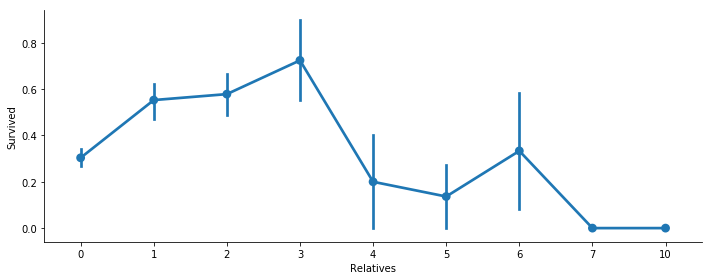

In [15]:
axes=sns.factorplot(x='Relatives',y='Survived',data=train_df,aspect=2.5)


Clearly, with 1 to 3 relatives a person has high chances of survival.

# Data Prepration

In [16]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


First let's investigate** Age.**
I think it will be  better to impute age as the average of respective Pclass.

#### Age

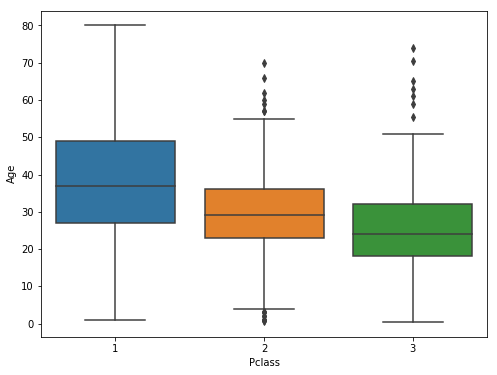

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass',y='Age',data=train_df)

In [18]:
import math
age_ser = train_df.groupby('Pclass').mean()['Age'].map(lambda x:math.trunc(x))
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if(pd.isnull(Age)):
        return age_ser[Pclass]
    return Age

In [19]:
train_df['Age']=train_df[['Age','Pclass']].apply(impute_age,axis=1)
train_df['Age'] = train_df['Age'].astype(int)

In [20]:
train_df['Age'].isnull().sum()

0

#### Embarked
Since it has only two missing values , so we will fill it with the most frequent one.

In [21]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [22]:
top = 'S'
train_df['Embarked'].fillna('S',inplace=True)

In [23]:
ports = {"S":0,"C":1,"Q":2}
train_df['Embarked']=train_df['Embarked'].map(ports)

#### Sex

In [24]:
gender ={"male":0,"female":1}
train_df['Sex']=train_df['Sex'].map(gender)

In [25]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,0,1


#### Name

In [26]:
train_df['Name'].str.extract('([A-Za-z]+)\.',expand = False).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [27]:
train_df['Name'].str.extract('([A-Za-z]+)\.',expand = False).value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Name, dtype: int64

In [28]:
titles={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}
train_df['Title'] = train_df['Name'].str.extract('([A-Za-z]+)\.',expand = False)
#less frequent
train_df['Title'] = train_df['Title'].replace(['Don', 'Rev', 'Dr',  \
       'Major', 'Lady', 'Sir' , 'Col', 'Capt', 'Countess',\
       'Jonkheer'],'Rare')
train_df['Title'] = train_df['Title'].replace('Mlle','Miss')
train_df['Title'] = train_df['Title'].replace('Ms','Miss')
train_df['Title'] = train_df['Title'].replace('Mme','Mrs')
train_df['Title'] = train_df['Title'].map(titles)
train_df['Title'].fillna(0,inplace = True)

In [29]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,1,0,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,1,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,0,1,1


## Creating Categories

#### Age

In [30]:
train_df['Age'].astype(int,inplace = True)
train_df.loc[train_df['Age']<= 11,'Age'] = 0
train_df.loc[(train_df['Age'] > 11) & (train_df['Age'] <= 22), 'Age'] = 1
train_df.loc[(train_df['Age'] > 22) & (train_df['Age'] <= 33), 'Age'] = 2
train_df.loc[(train_df['Age'] > 33) & (train_df['Age'] <= 44), 'Age'] = 3
train_df.loc[(train_df['Age'] > 44) & (train_df['Age'] <= 55), 'Age'] = 4
train_df.loc[(train_df['Age'] > 55) & (train_df['Age'] <= 66), 'Age'] = 5
train_df.loc[train_df['Age'] > 66,'Age'] = 6

In [31]:
 train_df['Age'].value_counts()

2    379
3    166
1    163
4     76
0     68
5     32
6      7
Name: Age, dtype: int64

#### Fair

In [32]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [33]:
train_df.loc[train_df['Fare'] <= 7.91,'Fare'] = 0
train_df.loc[(train_df['Fare']>7.91) & (train_df['Fare']<=14.454),'Fare'] = 1
train_df.loc[(train_df['Fare']>14.454) & (train_df['Fare']<=31),'Fare'] = 2
train_df.loc[(train_df['Fare']>31) & (train_df['Fare']<=99),'Fare'] = 3
train_df.loc[(train_df['Fare']>99) & (train_df['Fare']<=250),'Fare'] = 4
train_df.loc[train_df['Fare']>250,'Fare'] = 5

In [34]:
train_df['Fare']=train_df['Fare'].astype(int)

In [35]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,3,C85,1,1,0,3
2,3,1,3,"Heikkinen, Miss. Laina",1,2,0,0,STON/O2. 3101282,1,NaN,0,0,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3,1,0,113803,3,C123,0,1,0,3
4,5,0,3,"Allen, Mr. William Henry",0,3,0,0,373450,1,NaN,0,0,1,1


In [36]:
train_df.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)

In [37]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Alone,Title
0,0,3,0,1,1,0,0,0,1,0,1
1,1,1,1,3,1,0,3,1,1,0,3
2,1,3,1,2,0,0,1,0,0,1,2
3,1,1,1,3,1,0,3,0,1,0,3
4,0,3,0,3,0,0,1,0,0,1,1
5,0,3,0,2,0,0,1,2,0,1,1
6,0,1,0,4,0,0,3,0,0,1,1
7,0,3,0,0,3,1,2,0,4,0,4
8,1,3,1,2,0,2,1,0,2,0,3
9,1,2,1,1,1,0,2,1,1,0,3


In [39]:
pca = PCA()

In [55]:
pca.fit_transform(train_df.drop('Survived',axis=1))

array([[ -3.03850064e-01,  -2.10877327e+00,   3.87980083e-01, ...,
         -1.10464957e-01,  -8.37205283e-01,   2.27946111e-14],
       [  9.93331405e-01,   2.12236864e+00,  -8.21897085e-01, ...,
         -3.24124674e-01,  -3.31583001e-01,   8.74178040e-15],
       [ -1.13695355e+00,  -4.95327638e-01,  -5.02598933e-01, ...,
         -4.91900227e-01,   3.19234340e-01,   1.30790428e-14],
       ..., 
       [  2.51351095e+00,  -4.99695990e-01,   3.57417275e-01, ...,
         -4.36218396e-01,  -6.98577166e-02,  -2.33974502e-16],
       [ -1.03576845e+00,   8.55466824e-01,  -3.15344979e-01, ...,
          1.46852158e-01,   1.70918094e-01,   1.71247371e-16],
       [ -1.80917558e+00,  -1.28399444e+00,   3.67625071e-01, ...,
          2.62259295e-01,   3.62893100e-02,   5.45955260e-17]])

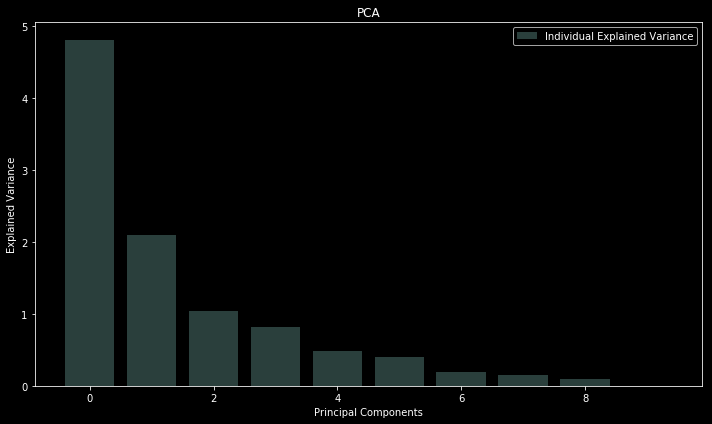

In [57]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,6))
    plt.bar(range(10),pca.explained_variance_,alpha = 0.3,label='Individual Explained Variance')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance')
    plt.title('PCA')
    plt.legend(loc='best')
    plt.tight_layout()

In [59]:
X =  train_df.drop('Survived',axis=1)
Y =   train_df['Survived']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 101)

# Building Machine Learning Models

In [65]:
#Random Forests
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
rfc_train_acc = round(rfc.score(x_train,y_train)*100,2)
rfc_test_acc = round(rfc.score(x_test,y_test)*100,2)
y_pred = rfc.predict(x_test)
print confusion_matrix(y_test,y_pred)
print classification_report(y_test,y_pred)

[[138  16]
 [ 36  78]]
             precision    recall  f1-score   support

          0       0.79      0.90      0.84       154
          1       0.83      0.68      0.75       114

avg / total       0.81      0.81      0.80       268



[[138  16]
 [ 35  79]]
             precision    recall  f1-score   support

          0       0.80      0.90      0.84       154
          1       0.83      0.69      0.76       114

avg / total       0.81      0.81      0.81       268



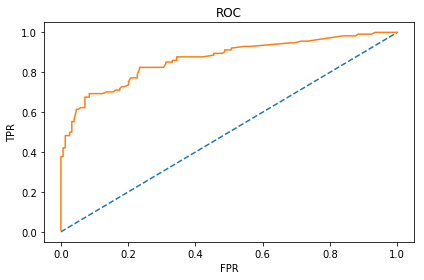

In [68]:
#Logestic Regression
lgmod = LogisticRegression()
lgmod.fit(x_train,y_train)
lgmod_train_acc = round(lgmod.score(x_train,y_train)*100,2)
lgmod_test_acc = round(lgmod.score(x_test,y_test)*100,2)
y_pred = lgmod.predict(x_test)
print confusion_matrix(y_test,y_pred)
print classification_report(y_test,y_pred)
#roc
y_pred_proba = lgmod.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_proba)
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend()
plt.tight_layout()